In [1]:

import pandas as pd
import sys
sys.path.append("..")  # 添加上级目录

from config.contract_margin import contract_margin_ratio
from config.contract_multiplier import contract_multipliers
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  # 字号，你可以调大调小

history=pd.read_csv("../data/9999_1m_0708v3_backtest.csv")
history['datetime'] = pd.to_datetime(history['datetime'])
history=history[(history['datetime'].dt.month>=12)&((history['datetime'].dt.day>=15))]

history.columns=['datetime', 'instrument', 'open', 'close', 'high', 'low', 'volume', 'money',
       'avg', 'high_limit', 'low_limit', 'paused', 'factor', 'open_interest',
       'contract', 'change', 'vwap', 'preclose']

import pandas as pd
df = pd.read_csv("../experiments/futures_fnn_cross_sectional_20250710_160917/test_predictions.csv")
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
merged_df = pd.merge(
    df,
    history,
    on=['datetime', 'instrument'],  # 按这两列合并
    how='left'  # 合并方式：inner/outer/left/right
)

merged_df['Multiplier'] = merged_df['instrument'].map(contract_multipliers)
merged_df['Margin_ratio'] = merged_df['instrument'].map(contract_margin_ratio)

      contract direction          entry_time  entry_price           exit_time  \
0  AP9999.XZCE     short 2024-12-18 14:14:00  7271.000000 2024-12-18 14:18:00   
1  AP9999.XZCE      long 2024-12-20 14:48:00  7321.000000 2024-12-20 14:52:00   
2  AP9999.XZCE     short 2024-12-23 09:47:00  7223.000000 2024-12-23 09:51:00   
3  EC9999.XINE      long 2024-12-16 10:31:00  2518.060825 2024-12-16 10:35:00   
4  EC9999.XINE      long 2024-12-16 10:57:00  2543.052941 2024-12-16 11:01:00   

    exit_price    return    gross_pnl         fee      net_pnl         margin  \
0  7264.841777  0.000847  1662.720267  392.467728  1270.252539  196317.000000   
1  7334.000000  0.001776  3510.000000  395.685000  3114.315000  197667.000000   
2  7202.367169  0.002857  5570.864393  389.484914  5181.379480  195021.000000   
3  2514.159574 -0.001549 -2574.825181  332.126546 -2906.951727  199430.417320   
4  2534.867284 -0.003219 -5320.677197  330.064815 -5650.742011  198358.129412   

   position_size  
0      

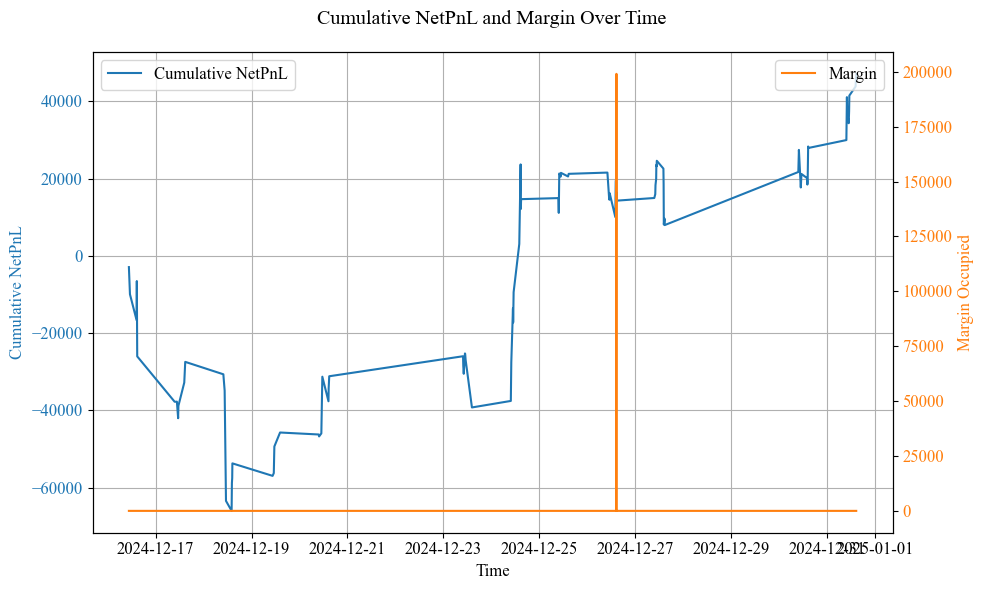

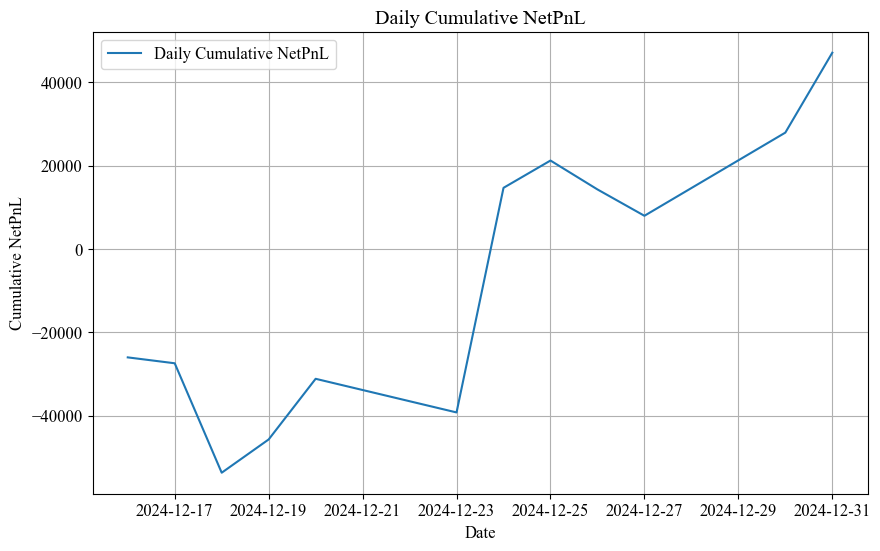

Annualized Return: 49.48%
Annualized Volatility: 15.86%
Sharpe Ratio: 3.12
Max Drawdown: -1.40%


In [4]:
from src.backtest.generate_trade import generate_trade_records
from src.backtest.analyze import analyze_trade_performance
trade_records_df = generate_trade_records(
    merged_df=merged_df,
    long_threshold=0.0008,
    short_threshold=-0.0008,
    fee_rate=1e-4,
    risk_control=True,
    account=2_000_000,
    position_ratio=0.1,
    holding_minutes=5,
    confirm_times= 1 # 新增参数：连续信号确认次数
)

print(trade_records_df.head())



daily_df = analyze_trade_performance(trade_records_df, account=2_000_000)
